## Traffic Sign Classification using LeNet

### Import Libraries

In [1]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pickle # to import the data
import seaborn as sns
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random

In [3]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [5]:
X_train.shape

(34799, 32, 32, 3)

In [6]:
y_train.shape

(34799,)

### Explore the Image

37

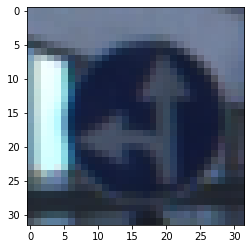

In [7]:
i = 5000
plt.imshow(X_train[i]) # Show images are not shuffled
y_train[i]

### Data Preperation

In [8]:
## Shuffle the dataset to normalize the input
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [9]:
# Normalization - sum all the RGB pixels and average them
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True) 

In [10]:
X_train.shape

(34799, 32, 32, 3)

In [11]:
X_train_gray.shape

(34799, 32, 32, 1)

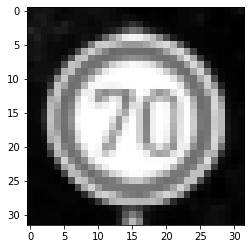

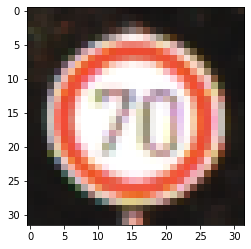

In [12]:
i = 500
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])

In [13]:
# Normalize: taking the values in between -1 and 1
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [14]:
X_test_gray_norm.shape

(12630, 32, 32, 1)

In [15]:
X_test_gray_norm[500][5][5][0]

-0.6171875

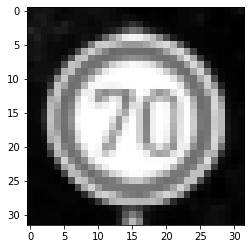

In [16]:
i=500
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')

### Model Building

The model consists of the following layers: 

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6


    * Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [17]:
#pip install tensorflow

In [18]:
#pip install keras

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split

In [20]:
image_shape = X_train_gray[i].shape

In [21]:
cnn_model = Sequential()
#step 1
cnn_model.add(Conv2D(filters = 6, kernel_size=(5,5), activation = 'relu', input_shape = (32,32,1)))
cnn_model.add(AveragePooling2D())
#step 2
cnn_model.add(Conv2D(filters = 16, kernel_size=(5,5), activation = 'relu'))
cnn_model.add(AveragePooling2D())
#step 3
cnn_model.add(Flatten())
#step 4
cnn_model.add(Dense(units = 120, activation = 'relu'))
#step 5
cnn_model.add(Dense(units = 84, activation = 'relu'))
#step 6
cnn_model.add(Dense(units = 43, activation = 'softmax'))

### Train the Model 

In [22]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy' # if two outputs binary cross entropy, here categorical cross entropy
                  , optimizer = Adam(lr = 0.001) # learning rate: how fast the network would be learning
                  , metrics = ['accuracy']
                 )

In [23]:
history = cnn_model.fit(X_train_gray_norm,
              y_train,
              batch_size = 500, # how many images we are feeding to the network at once
              epochs = 100, # how many times we are running the whole network
              verbose = 1, # how we are displaying, while training
              validation_data = (X_validation_gray_norm, y_validation)
             )



Epoch 1/100
70/70 [==============================] - 4s 57ms/step - loss: 3.1021 - accuracy: 0.2021 - val_loss: 2.5352 - val_accuracy: 0.3338
Epoch 2/100
70/70 [==============================] - 4s 58ms/step - loss: 1.5585 - accuracy: 0.5660 - val_loss: 1.3313 - val_accuracy: 0.6240
Epoch 3/100
70/70 [==============================] - 4s 56ms/step - loss: 0.8712 - accuracy: 0.7530 - val_loss: 0.9588 - val_accuracy: 0.7265
Epoch 4/100
70/70 [==============================] - 4s 55ms/step - loss: 0.6271 - accuracy: 0.8255 - val_loss: 0.8319 - val_accuracy: 0.7594
Epoch 5/100
70/70 [==============================] - 4s 60ms/step - loss: 0.5039 - accuracy: 0.8617 - val_loss: 0.7022 - val_accuracy: 0.7941
Epoch 6/100
70/70 [==============================] - 4s 61ms/step - loss: 0.4217 - accuracy: 0.8875 - val_loss: 0.6905 - val_accuracy: 0.7966
Epoch 7/100
70/70 [==============================] - 4s 60ms/step - loss: 0.3682 - accuracy: 0.9022 - val_loss: 0.6132 - val_accuracy: 0.8206
Epoch 

70/70 [==============================] - 4s 58ms/step - loss: 0.0124 - accuracy: 0.9965 - val_loss: 0.7398 - val_accuracy: 0.8819
Epoch 59/100
70/70 [==============================] - 4s 58ms/step - loss: 0.0101 - accuracy: 0.9979 - val_loss: 0.6916 - val_accuracy: 0.8909
Epoch 60/100
70/70 [==============================] - 4s 58ms/step - loss: 0.0114 - accuracy: 0.9968 - val_loss: 0.7150 - val_accuracy: 0.8882
Epoch 61/100
70/70 [==============================] - 4s 58ms/step - loss: 0.0088 - accuracy: 0.9983 - val_loss: 0.7219 - val_accuracy: 0.8902
Epoch 62/100
70/70 [==============================] - 4s 58ms/step - loss: 0.0062 - accuracy: 0.9987 - val_loss: 0.7394 - val_accuracy: 0.8893
Epoch 63/100
70/70 [==============================] - 4s 58ms/step - loss: 0.0058 - accuracy: 0.9990 - val_loss: 0.7438 - val_accuracy: 0.8839
Epoch 64/100
70/70 [==============================] - 4s 58ms/step - loss: 0.0048 - accuracy: 0.9991 - val_loss: 0.7144 - val_accuracy: 0.8975
Epoch 65/100

### Model Evaluation

In [24]:
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.8788


In [25]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

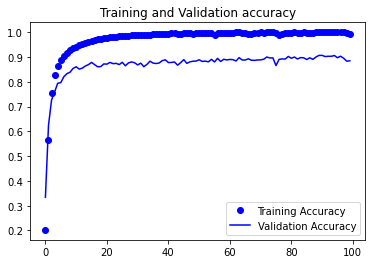

In [26]:
# plot the accuracy

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()


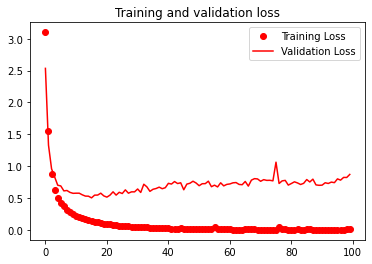

In [27]:
# plot the loss

plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [28]:
#get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test_gray_norm)
#get the indices to be plotted
y_true = y_test

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


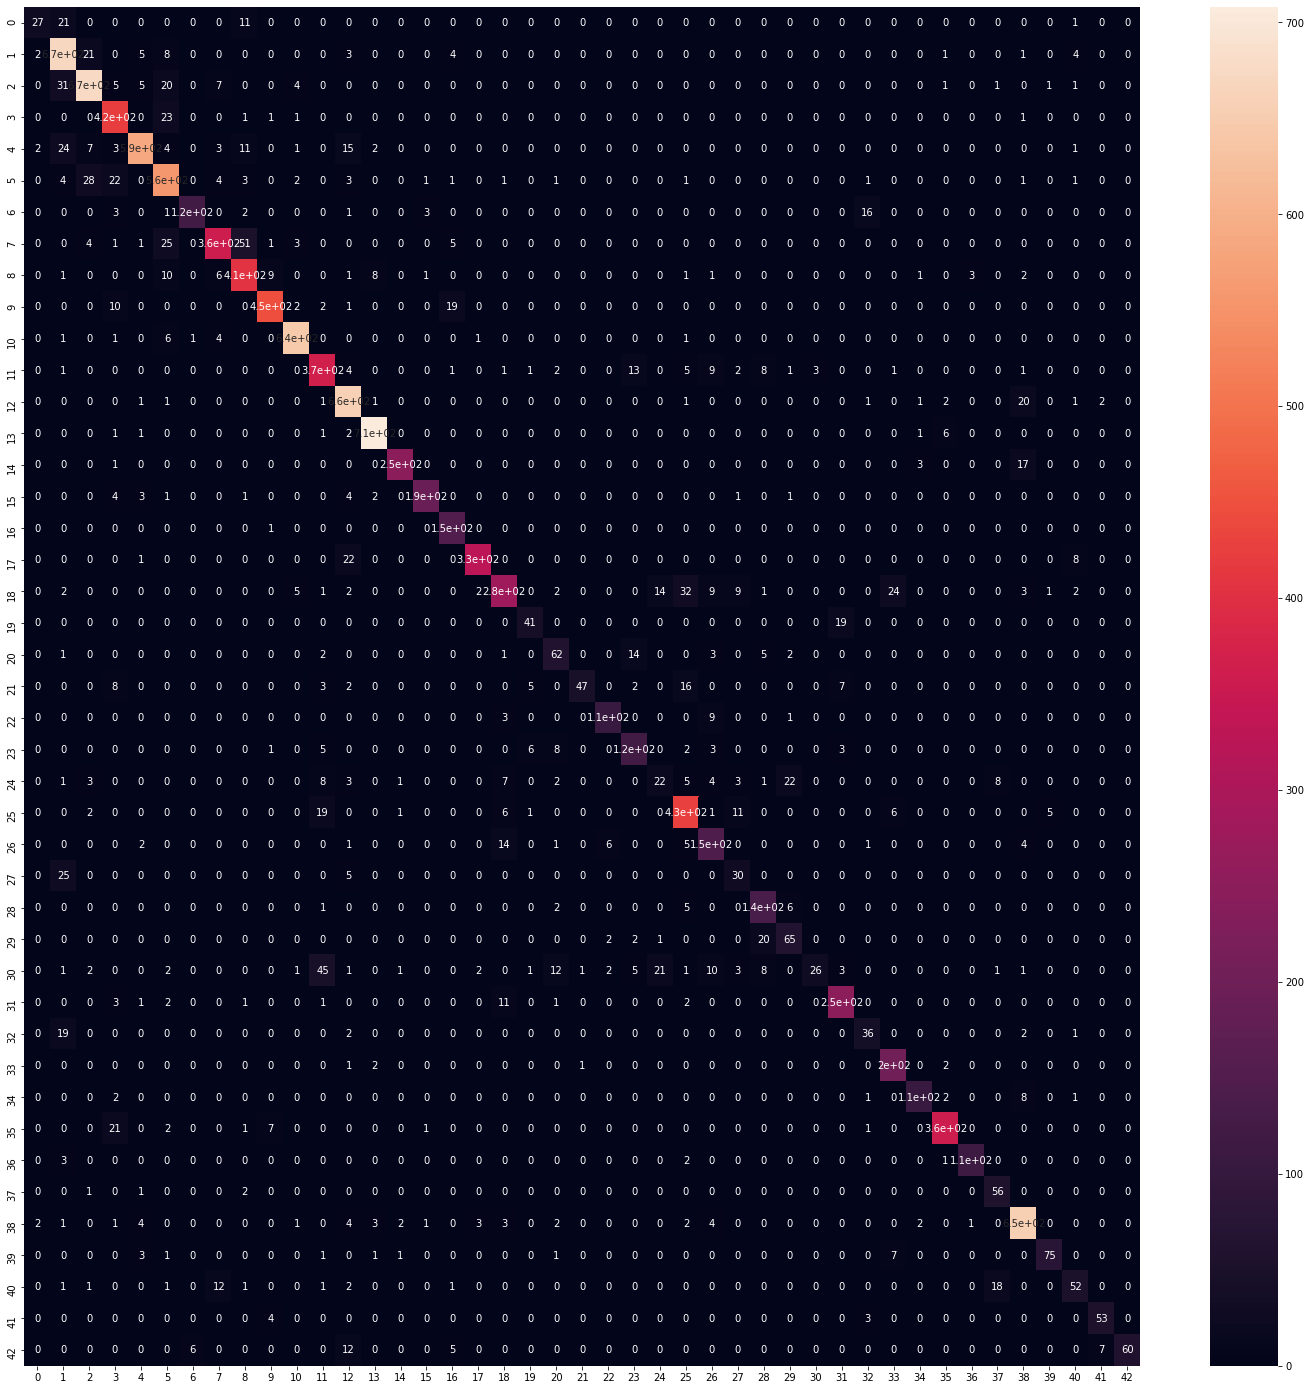

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot=True)

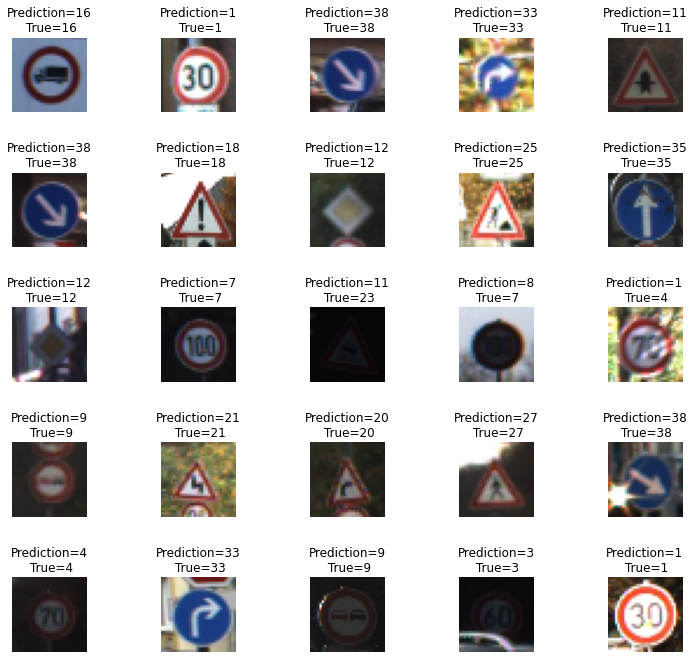

In [32]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)